In [2]:
# library importation
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# importing datasets 

# dataset 1
data1 = pd.read_csv('dataset1/static_features_latest_new_4gram_latest.csv')
data2 = pd.read_csv('dataset2/drebin-215-dataset-5560malware-9476-benign.csv')

data1.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.942,0.943,0.944,0.945,0.946,0.947,0.948,0.949,0.950,0.951
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [4]:
data2.head(3)

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S


#### Data Exploration

In [5]:
print('Dataset 1 --> Samples:', data1.shape[0], 'Features:', data1.shape[1])
print('Dataset 2 --> Samples:', data2.shape[0], 'Features:', data2.shape[1])

Dataset 1 --> Samples: 2927 Features: 957
Dataset 2 --> Samples: 15036 Features: 216


#### dataset 1

In [6]:
print('numbers of duplicate : ', data2.duplicated().sum())

numbers of duplicate :  6865


In [7]:
col_list1 = []
for col in data1: 
    if (data1[col].dtype==np.object_) :
        col_list1.append(col)
        
print('empty list shows all data are numberic in nature')
col_list1

empty list shows all data are numberic in nature


[]

In [8]:
data1.columns

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.942', '0.943', '0.944', '0.945', '0.946', '0.947', '0.948', '0.949',
       '0.950', '0.951'],
      dtype='object', length=957)

<Axes: >

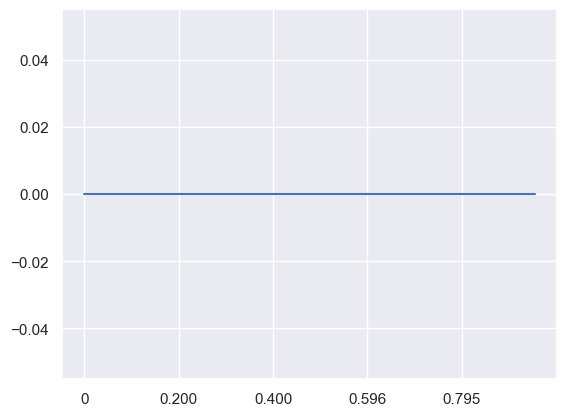

In [9]:
sn.set()
data1.isnull().sum().plot()

0.951
1    2063
0     864
Name: count, dtype: int64


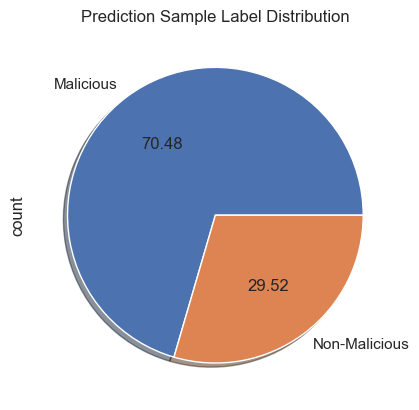

In [11]:
print(data1[data1.columns[-1]].value_counts())
data1[data1.columns[-1]].value_counts().plot(kind='pie',shadow=True,  autopct='%.2f', labels=['Malicious', 'Non-Malicious'])
plt.title('Prediction Sample Label Distribution')
plt.show()


In [ ]:
#=================== dataset 1 observation =============
# 1. highly imbalance (SMOTE data balacing is required..)
# 2. there is duplicate (removal of duplicate is required) 
# 3. no empty value 



#### dataset 2

In [13]:
# data2.corr()
data2[data2.columns[:5]].head(3)

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0


In [14]:
col_list = []
for col in data2: 
    if (data2[col].dtype==np.object_) :
        col_list.append(col)
        
col_list

['TelephonyManager.getSimCountryIso', 'class']

In [16]:
data2[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   TelephonyManager.getSimCountryIso  15036 non-null  object
 1   class                              15036 non-null  object
dtypes: object(2)
memory usage: 235.1+ KB


In [17]:
data2[col_list].head(3)

,TelephonyManager.getSimCountryIso,class
0,0,S
1,0,S
2,0,S


In [18]:
data2[col_list[0]][0]

'0'

In [19]:
data2['class'].value_counts()

class
B    9476
S    5560
Name: count, dtype: int64

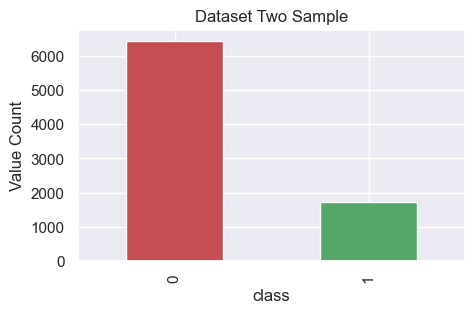

In [170]:
sn.set()
plt.figure(figsize=(5,3))
data2['class'].value_counts().plot(kind='bar', color=['r', 'g'])
plt.title('Dataset Two Sample')
plt.ylabel('Value Count')
plt.show()

In [23]:
# checking for columns with more that two unique values
mul_val_list = []
for col in data2.columns: 
    if len(data2[col].unique()) > 2:
        mul_val_list.append(col)

mul_val_list

['TelephonyManager.getSimCountryIso']

In [24]:
data2['TelephonyManager.getSimCountryIso'].unique()

array(['0', '1', '?', 1, 0], dtype=object)

In [25]:
data2.isnull().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

In [26]:
data2.duplicated().sum()

6865

In [31]:
data2.drop(columns=col_list).corr()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
transact,1.000000,0.810812,0.816442,0.963364,0.813181,0.881938,-0.274731,0.656768,0.587103,0.613781,...,-0.005148,0.068374,-0.003832,-0.021260,0.210113,0.244306,0.121453,-0.008323,-0.005148,-0.000828
onServiceConnected,0.810812,1.000000,0.983198,0.783617,0.984796,0.842693,-0.324517,0.644763,0.596667,0.593651,...,0.044229,0.059576,-0.002053,-0.023800,0.193199,0.257267,0.126678,-0.018780,-0.002141,0.007813
bindService,0.816442,0.983198,1.000000,0.791208,0.994622,0.848719,-0.321665,0.649462,0.599769,0.595746,...,0.043333,0.062403,0.001044,-0.023304,0.197051,0.258431,0.128311,-0.017788,-0.001477,0.008242
attachInterface,0.963364,0.783617,0.791208,1.000000,0.787798,0.861441,-0.263826,0.642650,0.580424,0.608945,...,-0.004520,0.065935,-0.001301,-0.021670,0.213878,0.232359,0.119865,-0.011382,-0.002906,0.005000
ServiceConnection,0.813181,0.984796,0.994622,0.787798,1.000000,0.848134,-0.322458,0.646782,0.599281,0.594103,...,0.042927,0.063658,-0.001608,-0.023590,0.195932,0.257263,0.132108,-0.018360,-0.001860,0.006604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRITE_EXTERNAL_STORAGE,0.244306,0.257267,0.258431,0.232359,0.257263,0.232556,0.008592,0.294834,0.247363,0.252565,...,0.027626,0.116440,-0.001646,-0.038196,0.279620,1.000000,0.248422,0.047683,0.004028,0.037904
ACCESS_FINE_LOCATION,0.121453,0.126678,0.128311,0.119865,0.132108,0.102486,-0.008198,0.199319,0.196201,0.203792,...,0.070313,0.195201,0.018804,0.018865,0.216044,0.248422,1.000000,0.025548,0.040558,0.053991
SET_WALLPAPER_HINTS,-0.008323,-0.018780,-0.017788,-0.011382,-0.018360,-0.021553,0.016163,0.010440,0.042286,-0.008377,...,0.001905,0.142462,-0.000807,0.016059,0.009940,0.047683,0.025548,1.000000,0.058873,-0.020024
SET_PREFERRED_APPLICATIONS,-0.005148,-0.002141,-0.001477,-0.002906,-0.001860,-0.015285,-0.011377,-0.035590,-0.001648,-0.025952,...,0.002401,0.041856,0.013079,0.006701,0.040013,0.004028,0.040558,0.058873,1.000000,0.085295


In [ ]:
# ================  dataset 2 observation =================
# 1. high dimentinal data (dimentionality reduction techniques)
# 2. the dataset contain duplicate values... (removal of duplicate is needed )
# 3. datast is not balance ... data balacing is reqired
# 4. data contain inconsitent value and incorrect format.. data transfromation is needed

#### DATA preprocessing 

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
# removing duplicates
data1.drop_duplicates(inplace=True)
data2.drop_duplicates(inplace=True)
print('duplicate removed')

duplicate removed


In [34]:
print('Dataset 1: ', data1.duplicated().sum())
print('Dataset 2: ', data2.duplicated().sum())

Dataset 1:  0
Dataset 2:  0


In [49]:
last_col

'0.951'

In [50]:
# extract X, y 
last_col  = data1.columns[-1]
X1 = data1.drop(columns=[last_col])
y1 = data1[last_col]

In [51]:
X1.head(2)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.941,0.942,0.943,0.944,0.945,0.946,0.947,0.948,0.949,0.950
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [53]:
# checking the number of classification class 
y1.unique()

array([0, 1], dtype=int64)

In [52]:
y1.head(3)

0    0
1    1
2    1
Name: 0.951, dtype: int64

In [36]:
# removal of incosistence data value and label encode data from dataset 2
data2[col_list[0]].unique()

array(['0', '1', '?', 1, 0], dtype=object)

In [37]:
data2[data2[col_list[0]] == '?']

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S
2109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,S


In [38]:
data2.shape

(8171, 216)

In [39]:
data2 = data2[data2[col_list[0]] != '?']
data2.shape

(8169, 216)

In [40]:
# transforming the column into int value 
data2['TelephonyManager.getSimCountryIso'] = pd.to_numeric(data2['TelephonyManager.getSimCountryIso']).astype('int32')
data2['TelephonyManager.getSimCountryIso'].dtype

dtype('int32')

In [41]:
data2['class'] = data2['class'].astype('category')
data2['class'].dtype

CategoricalDtype(categories=['B', 'S'], ordered=False, categories_dtype=object)

In [42]:
data2['class'] = data2['class'].cat.codes
data2[col_list].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8169 entries, 0 to 15033
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   TelephonyManager.getSimCountryIso  8169 non-null   int32
 1   class                              8169 non-null   int8 
dtypes: int32(1), int8(1)
memory usage: 103.7 KB


In [43]:
X2 = data2.drop(columns=['class'])
y2 = data2['class']

X2.sample(2)

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [44]:
y2.sample(5)

296     1
8446    0
4474    1
4841    1
1541    1
Name: class, dtype: int8

In [45]:
data2[col_list[1]].unique()

array([1, 0], dtype=int8)

#### Creating a Balacing Version of the Dataset 

In [68]:
# dataset 1 & 2 

smote = SMOTE()
X1_res, y1_res = smote.fit_resample(X1, y1)
X2_res, y2_res = smote.fit_resample(X2, y2)

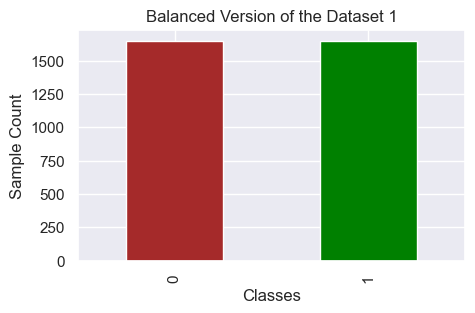

In [69]:
plt.figure(figsize=(5,3))
plt.title('Balanced Version of the Dataset 1')
y1_res.value_counts().plot(kind='bar', color=['brown', 'green'])
plt.ylabel('Sample Count')
plt.xlabel('Classes')
plt.show()

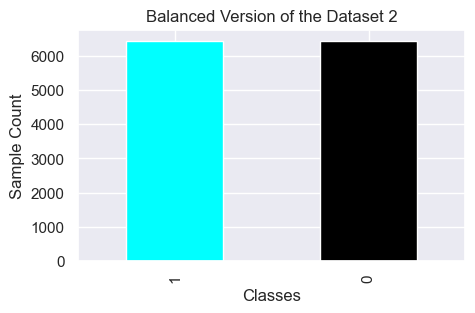

In [70]:
plt.figure(figsize=(5,3))
plt.title('Balanced Version of the Dataset 2')
y2_res.value_counts().plot(kind='bar', color=['cyan', 'black'])
plt.ylabel('Sample Count')
plt.xlabel('Classes')
plt.show()

In [ ]:
#### MODEL DEVELOPEMENT (NB, BN, SVM, LR, RT,DT, CART)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [81]:
# implementing grid search CV .
# SVM. 
gridsvm = GridSearchCV(SVC(gamma='auto'), {'C': [1,10, 20], 'kernel':['rbf', 'linear'] }, cv=5, return_train_score=False)
gridsvm.fit(X1_res, y1_res)
svm_data1 = pd.DataFrame(gridsvm.cv_results_)
svm_data1[['param_C','param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.906667
1,1,linear,0.940000
2,10,rbf,0.938485
3,10,linear,0.930303
4,20,rbf,0.947879
5,20,linear,0.930303


In [82]:
svm_data1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.170913,0.790120,0.768198,0.056605,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.928788,0.930303,0.930303,0.875758,0.868182,0.906667,0.028436,6
1,1.398611,0.030949,0.127796,0.019431,1,linear,"{'C': 1, 'kernel': 'linear'}",0.918182,0.943939,0.968182,0.943939,0.925758,0.940000,0.017344,2
2,2.229497,0.226875,0.574634,0.081794,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.950000,0.950000,0.962121,0.921212,0.909091,0.938485,0.019931,3
3,1.438883,0.172877,0.129639,0.018681,10,linear,"{'C': 10, 'kernel': 'linear'}",0.909091,0.931818,0.959091,0.934848,0.916667,0.930303,0.017249,4
4,1.758902,0.139069,0.449124,0.027384,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.954545,0.951515,0.968182,0.942424,0.922727,0.947879,0.015048,1
5,1.511596,0.409162,0.117200,0.011412,20,linear,"{'C': 20, 'kernel': 'linear'}",0.909091,0.931818,0.959091,0.934848,0.916667,0.930303,0.017249,4


In [86]:
gridsvm.best_score_

0.9478787878787879

In [85]:
# save to CSV
gridsvm.best_params_

{'C': 20, 'kernel': 'rbf'}

In [ ]:
# train svm using best parameter to collect accuracy precision, and recall 
svm_model  = SVC(gamma='auto', C=20, kernel='rbf')
svm_model.fit(X1_res, y1_res)

In [ ]:
# model and parameter tuning value 


In [90]:
model_config = {
    'svm': {
        'model':SVC(gamma='auto'), 
        'params':{'C':[1,10,20] , 'kernel':['rbf', 'linear']}
    }, 
    
    'random_forest':{
        'model':RandomForestClassifier(), 
        'params':{'n_estimators':[1,5,10]}
    },
    
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{'C':[1,5,10]}
    }, 
    
    'decision_tree': {
        'model': DecisionTreeClassifier(), 
        'params': {'splitter':["best", "random"]}
    }
}


# loop
scores  = []
for model, config in model_config.items(): 
    gridcv = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=True)
    gridcv.fit(X1_res, y1_res)
    scores.append( {'model':model , 'best_score': gridcv.best_score_, 'best_params': gridcv.best_params_} )

print('Operation Completed.......')

Operation Completed.......


In [91]:
df_dataset1 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_dataset1

,model,best_score,best_params
0,svm,0.947879,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.950606,{'n_estimators': 5}
2,logistic_regression,0.953030,{'C': 1}
3,decision_tree,0.943636,{'splitter': 'random'}


In [94]:
# loop
scores2  = []
for model, config in model_config.items(): 
    gridcv2 = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=True)
    gridcv2.fit(X2_res, y2_res)
    scores2.append( {'model':model , 'best_score': gridcv2.best_score_, 'best_params': gridcv2.best_params_} )

print('Operation Completed dataset 2.......')

Operation Completed dataset 2.......


In [95]:
df_dataset2 = pd.DataFrame(scores2, columns=['model', 'best_score', 'best_params'])
df_dataset2

,model,best_score,best_params
0,svm,0.967132,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.976744,{'n_estimators': 10}
2,logistic_regression,0.960465,{'C': 5}
3,decision_tree,0.959457,{'splitter': 'random'}


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [99]:
# dataset 1

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=20)

In [162]:
def model_performance_trainer(name, model, Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain,ytrain)
    prediction = model.predict(Xtest)
    # print(prediction)
    metrics = {
        'model': name, 
        'acc': accuracy_score(ytest, prediction), 
        'pre': precision_score(ytest, prediction),
        'recall': accuracy_score(ytest, prediction), 
        'f1score': accuracy_score(ytest, prediction), 
        'roc_auc': accuracy_score(ytest, prediction), 
    }
    return metrics

In [163]:
#  DATASET 1

In [164]:
# using dataset 1
model_instance   = {'svm': SVC(gamma='auto', C=20, kernel='rbf'), 'Random Forest': RandomForestClassifier(n_estimators=5), 'Logistic Regression': LogisticRegression(C=1), 'Decision Tree':DecisionTreeClassifier(splitter='random') }
results = []
for name, model in model_instance.items(): 
    result = model_performance_trainer(name, model, X_train, y_train, X_test, y_test)
    results.append(result)

dataset1_results  = pd.DataFrame(results)
dataset1_results

,model,acc,pre,recall,f1score,roc_auc
0,svm,0.95,0.928571,0.95,0.95,0.95
1,Random Forest,0.95,0.928571,0.95,0.95,0.95
2,Logistic Regression,1.00,1.000000,1.00,1.00,1.00
3,Decision Tree,0.95,0.928571,0.95,0.95,0.95


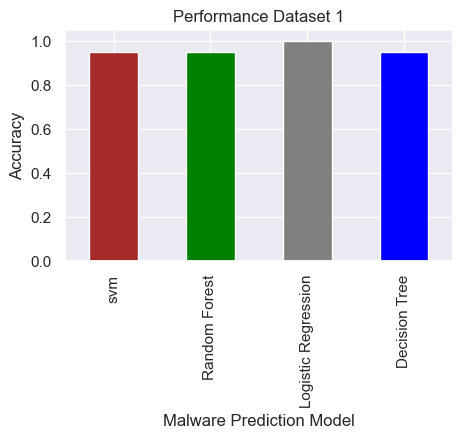

In [165]:
plt.figure(figsize=(5,3))
plt.title('Performance Dataset 1')
dataset1_results.set_index('model').acc.plot(kind='bar', color=['brown','green', 'gray', 'blue'])
plt.ylabel('Accuracy')
plt.xlabel('Malware Prediction Model')
plt.show()

In [166]:
# DATASET 2

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=20)

In [168]:
# using dataset 1
model_instance   = {'svm': SVC(gamma='auto', C=20, kernel='rbf'), 'Random Forest': RandomForestClassifier(n_estimators=5), 'Logistic Regression': LogisticRegression(C=1), 'Decision Tree':DecisionTreeClassifier(splitter='random') }
results2 = []
for name, model in model_instance.items(): 
    # loop trough via helper function
    result = model_performance_trainer(name, model, X_train, y_train, X_test, y_test)
    results2.append(result)
    
dataset2_results  = pd.DataFrame(results2)
dataset2_results

,model,acc,pre,recall,f1score,roc_auc
0,svm,0.95,0.833333,0.95,0.95,0.95
1,Random Forest,0.90,0.800000,0.90,0.90,0.90
2,Logistic Regression,0.90,0.800000,0.90,0.90,0.90
3,Decision Tree,0.90,0.800000,0.90,0.90,0.90


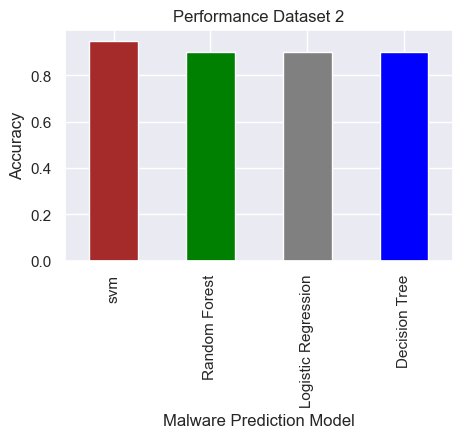

In [169]:
plt.figure(figsize=(5,3))
plt.title('Performance Dataset 2')
dataset2_results.set_index('model').acc.plot(kind='bar', color=['brown','green', 'gray', 'blue'])
plt.ylabel('Accuracy')
plt.xlabel('Malware Prediction Model')
plt.show()